# <b> Implement Logistic regression with L2 regularization without using Scikit learn </b>

## 1. Creating custom dataset

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#make classification is used to create custom dataset
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5, n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

#perform train and test split
#No data standardization is required as it already standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

#Print the shape of the datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

## 2. First train the sklearn model to compare the results

In [2]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log_loss', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
print(clf)

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log_loss',
              random_state=15, verbose=2)


In [3]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log_loss',
              random_state=15, verbose=2)

In [4]:
#Print the coefficinets for reference later for comparision
print("coefficients : " ,clf.coef_)
print("\n number of coefficients = ", clf.coef_.shape[1])
print("\n intercept = ", clf.intercept_)

coefficients :  [[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]]

 number of coefficients =  15

 intercept =  [-0.8531383]


## 3. Implement logistic regression with L2 regularization using SGD without using sklearn

### 3.1 Initialize the weights 

In [5]:
import numpy as np
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w= np.zeros_like(row_vector)
    b=0.0
    return w,b

#check whether they are initialized to zeros or not
row_1=X_train[0] 
w,b = initialize_weights(row_1)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0.0


### 3.2 Compute sigmoid

$sigmoid(z)= 1/(1+exp(-z))$

In [6]:
import numpy as np
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig_val = 1/(1+np.exp(-z))
    return sig_val


### 3.3 Compute log-loss

$log loss = -1*\frac{1}{n}\Sigma_{for each Y_{t},Y_{pred}}(Y_{t}*log_{10}(Y_{pred})+(1-Y_{t})*log_{10}(1-Y_{pred}))$

In [7]:
def logloss(y_true,y_pred):
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    
    n = y_true.shape[0]
    indi_loss = np.dot(y_true,np.log10(y_pred))+np.dot((1-y_true),np.log10(1-y_pred))
    loss= (-1/n)*np.sum(indi_loss)

    return loss

### 3.4 Compute the gradient wrt 'w' (weights)

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [8]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw=(x*(y-sigmoid(np.dot(w,x)+b)))-((alpha/N)*w)
    
    return dw

### 3.5 Compute the gradient wrt 'b' (bias)
$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [9]:
#sb should be a scalar value
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db= y-sigmoid(np.dot(w,x)+b)   
     return db

### 3.6 Prediction function

In [10]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)


## 4. Implementing logistic regression

In [12]:
from tqdm import tqdm

def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    #write your code to perform SGD
    N=X_train.shape[0]
    
    #loop for epochs 
    for e in tqdm(range(0,epochs)):
        
        #loop for each point in the dataset
        for i in range(0,X_train.shape[0]):
            
            #first get the gradients
            dw=gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
            db=gradient_db(X_train[i],y_train[i],w,b)
            
            #then update the weights
            w+=(eta0*dw)
            b+=(eta0*db)
            
        #predict on the train dataset
        y_train_pred=pred(w,b,X_train)
        
        #compute the loss on the train dataset
        tr_loss=logloss(y_train,y_train_pred)
        train_loss.append(tr_loss)
        
        #predict on the test dataset
        y_test_pred=pred(w,b,X_test)
        
        #compute the loss on the test dataset
        te_loss=logloss(y_test,y_test_pred)
        test_loss.append(te_loss)
        
        #condition ot terminate if the loss is not changing much
        #hence the condition for convergence
        if(e>0):
            if abs(tr_loss-train_loss[e-1]) < 0.0000001:
                break
      
    #finally return the loss values for each epoch and then the updated weights
    return w,b,train_loss,test_loss

#train the model to learn the weights and compute the losses along the way
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=30
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

  0%|          | 0/30 [00:00<?, ?it/s]

 63%|██████▎   | 19/30 [00:08<00:04,  2.32it/s]


## 5. Comparision between custom implementation weights and sklearn weights

### 5.1 Print the sklearn weights

In [13]:
#these are the weights from the sklearn implementation
print("sklearn weights = " ,clf.coef_,"\n sklearn bias = ",clf.intercept_)

sklearn weights =  [[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]] 
 sklearn bias =  [-0.8531383]


### 5.2 Custom weights of our implementation

In [14]:
print("Custom weights = ", w, "\n Custom bias = ", b)

Custom weights =  [-4.29394713e-01  1.92911531e-01 -1.48319226e-01  3.38095811e-01
 -2.20731189e-01  5.69669865e-01 -4.45186056e-01 -9.00099226e-02
  2.21598219e-01  1.73588003e-01  1.98538391e-01 -4.13172177e-04
 -8.11250040e-02  3.39070544e-01  2.29369069e-02] 
 Custom bias =  -0.8897519322788822


### 5.3 Difference between both to validate our implementation

In [15]:
print("Difference between weights = ", w-clf.coef_, "\n Difference between biases = ",b-clf.intercept_)

Difference between weights =  [[-0.0060278   0.00743588  0.00027113 -0.00334826 -0.01254449  0.00950408
   0.00723877  0.00407821  0.01232502 -0.00725326  0.00148649 -0.00463233
  -0.00152131  0.00054253  0.0002697 ]] 
 Difference between biases =  [-0.03661363]


## 6. Plot of train and test losses vs epochs to check for convergence 

Text(0.5, 1.0, 'train_loss vs epochs')

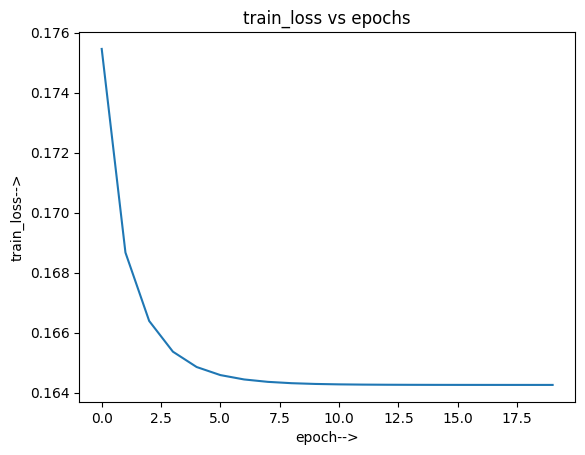

In [16]:
#plot for checking the convergence of the train loss after each epoch
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.xlabel('epoch-->')
plt.ylabel('train_loss-->')
plt.title('train_loss vs epochs')

Text(0.5, 1.0, 'test_loss vs epochs')

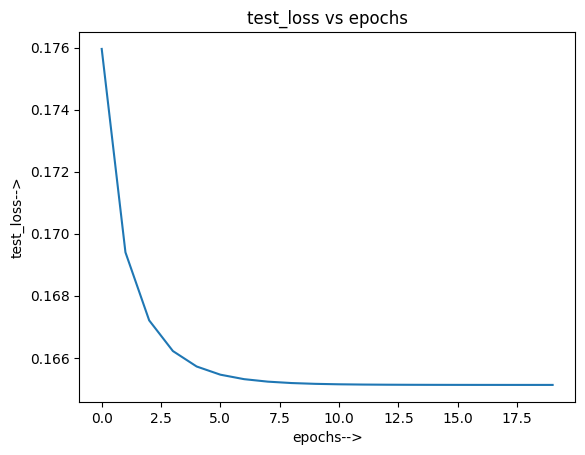

In [17]:
#plot for checking the comnvergence of test loss after each epoch

plt.plot(test_loss)
plt.ylabel('test_loss-->')
plt.xlabel('epochs-->')
plt.title('test_loss vs epochs')